# Python Machine Learning for Biology
# Hyperparameter Tuning

What is a hyperparameter?    

We'll go over some best practices for building machine learning models by fine-tuning hyperparameters and evaluating model performance.  

We'll cover:  
* Cross-Validation: Getting unbiased estimates of model performance
* Learning and Validation Curves: Diagnosing common problems
* GridSearch: Fine-tuning machine learning algorithms
* Evaluating models using different performance metrics

# Independent Work (Review)
Peform a logistic regression on the cancer dataset
1. import the cancer dataset
2. create X and y variables
3. encode categorical variables
4. split data into testing and training datasets (80:20)
5. standardize the data
6. perform a logistic regression
7. report the accuracy score

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [18]:
cancer = pd.read_csv("cancer.csv")

In [19]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = cancer.iloc[:, 1:].values

In [14]:
y = cancer['diagnosis'].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [15]:
le = LabelEncoder()

In [16]:
le.fit_transform(y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1,

(Side note: we can figure out what it labeled each class of tumor)

In [20]:
le.transform(['M', 'B'])

array([1, 0])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 1)

In [25]:
stdscl = StandardScaler()

In [26]:
X_train_std = stdscl.fit_transform(X_train)

In [28]:
X_test_std = stdscl.transform(X_test)

In [29]:
logreg = LogisticRegression()

In [32]:
logreg.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
logreg.score(X_test_std, y_test)

0.98245614035087714

## Cross Validation

What is overfitting? What is underfitting?  

Two techniques to try to figure out our model's generalization error are **holdout validation** and **k-fold cross validation.**  

### Holdout validation

We've been doing holdout validation, where we separate the dataset into training and testing datasets. But if we do lots of **model selection**, that is tune our hyper-parameters to see which give us the best model, we start reusing that same test dataset over and over again. Then the model is likely to overfit.  

A better way of using the holdout method is to divide the dataset into three parts: a training set, a test set, and a validation set. Use the training set to fit the model, use the validation set to compare model performance among different models, and use the test set to test model generalizability. This is a way less biased way to do it because the model has never seen the test data before.  

A disadvantage of this method is that it is sensitive to how we divide up the data. K-fold cross validation provides some solutions to this.

### K-fold Cross Validation

Split the data into *k* sets (folds) without replacement. Use *k-1* sets on model training and use 1 for model testing. Repeat *k* times. We'll have *k* models and *k* performance estimates.  

Then we can calculate the average performance of the model based on the *k* folds so we have a performance estimate that is less biased to how we sliced and diced the data. 

The standard value of *k* that people use is 10. It's a good idea to use a larger *k* if you are working with a smaller dataset (lower generalization bias the higher your *k*). Larger values of *k* will have a slower runtime.  

**Stratified k-fold cross validation** has even better bias and variance estimates, especially if you have really unequal class proportions. This method preserves the class proportions in each fold.

#### Perform a stratified k-fold cross validation on the cancer dataset

In [38]:
from sklearn.cross_validation import cross_val_score

In [39]:
scores = cross_val_score(estimator = logreg, X = X_train_std, y = y_train, cv = 10, n_jobs = 1)

In [40]:
print(scores)

[ 0.93478261  0.97826087  0.95652174  0.97826087  0.97826087  1.          1.
  0.97777778  0.97777778  0.97777778]


In [41]:
print(np.mean(scores), np.std(scores))

0.975942028986 0.0180417805693


## Diagnostics: Learning and Validation Curves

### Diagnosing bias and variance with learning curves

Learning curves plot the number of training samples and accuracy for both training and validation.  

Models with high bias in both training and validation sets indicate overfitting. Increasing number of model parameters or decreasing regularization can help.  

Models with high variance (big gap between training and validation sets are overfit. Collecting more data, reducing the complexity of the model, or increasing regularization can help.

#### Plot the learning curves for the cancer data

In [108]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

In [109]:
pipe_lr = Pipeline([
    ('scl', StandardScaler()), 
    ('clf', LogisticRegression(penalty='l2', random_state=0))])

In [110]:
train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipe_lr,
                  X=X_train,
                  y=y_train, 
                  train_sizes=np.linspace(0.1, 1.0, 10),
                  cv=10,
                  n_jobs=1)

In [111]:
train_mean = np.mean(train_scores, axis = 1)

In [112]:
train_std = np.std(train_scores, axis = 1)

In [113]:
test_mean = np.mean(test_scores, axis = 1)

In [114]:
test_std = np.std(test_scores, axis = 1)

In [115]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')

In [116]:
plt.fill_between(train_sizes, train_mean + train_std, train_mean-train_std, alpha=0.15, color = 'blue')

In [117]:
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize=5, label = 'validation accuracy')

In [118]:
plt.fill_between(train_sizes, test_mean + test_std, test_mean-test_std, alpha=0.15, color = 'green')

In [119]:
plt.grid()

In [120]:
plt.xlabel('Number of training samples')

In [121]:
plt.ylabel('Accuracy')

In [122]:
plt.legend(loc = 'lower right')

In [123]:
plt.ylim([0.8, 1.0])

(0.8, 1.0)

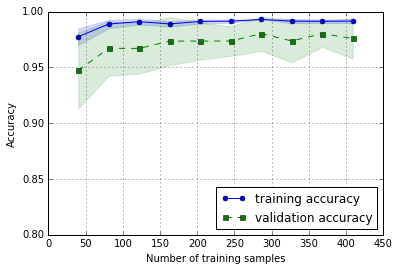

In [124]:
plt.show()

How does our model look?

### Addressing overfitting and underfitting with validation curves

Validation curves are like learning curves, but instead of plotting training and validation accuracies as a function of sample size, we vary the values of the model parameters. 

#### Plot validation curves for the cancer data

In [129]:
from sklearn.learning_curve import validation_curve

In [130]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [132]:
train_scores, test_scores = validation_curve(
    estimator = pipe_lr, 
    X = X_train,
    y=y_train,
    param_name = 'clf__C',
    param_range = param_range,
    cv=10)

In [133]:
train_mean =np.mean(train_scores, axis=1)

In [134]:
train_std = np.std(train_scores, axis = 1)

In [135]:
test_mean = np.mean(test_scores, axis=1)

In [136]:
test_std = np.std(test_scores, axis = 1)

In [137]:
plt.plot(param_range, train_mean, color='blue', marker = 'o', markersize = 5, label = 'training accuracy')

In [138]:
plt.fill_between(param_range, train_mean + train_std, train_mean-train_std, alpha=0.15, color = 'blue')

In [139]:
plt.plot(param_range, test_mean, color='green', marker = 's', markersize = 5, label = 'validation accuracy')

In [140]:
plt.fill_between(param_range, test_mean+test_std, test_mean-test_std, alpha=0.15, color='green')

In [141]:
plt.grid()

In [142]:
plt.xscale('log')

In [143]:
plt.legend(loc='lower right')

In [144]:
plt.xlabel('Parameter C')

In [145]:
plt.ylabel('Accuracy')

In [146]:
plt.ylim([0.8, 1.0])

(0.8, 1.0)

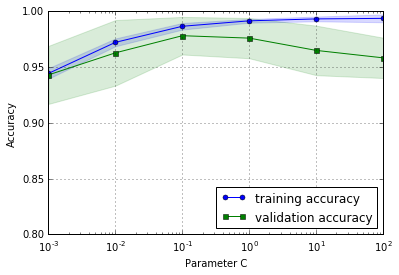

In [147]:
plt.show()

Which levels of C seem best?

## Grid Search: fine-tuning models

Review: Which parameters does the machine learning model "learn"? Which are parameters we have to tune?  

Validation curves help us figure out an optimal value of one hyperparameter. Grid search helps us find optimal combinations of hyperparameters.

#### Perform a grid search on an SVM of our cancer data

In [149]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC 

In [150]:
pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

In [151]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [152]:
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

In [153]:
gs = GridSearchCV(estimator = pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)

In [154]:
gs = gs.fit(X_train, y_train)

In [155]:
print(gs.best_score_)

0.978021978021978


In [156]:
print(gs.best_params_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}


In [157]:
# use the test dataset to estimate model performance
clf = gs.best_estimator_

In [158]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [159]:
clf.score(X_test, y_test)

0.96491228070175439

### Nested cross-validation

Earlier we combined k-fold cross validation and grid search to fine-tune our hyperparameters. A better way to do this is with **nested cross-validation.**  

**Nested cross-validation** is when we have an outer k-fold cross-validation loop to split the data into training and testing folds and an inner loop used to select a model using k-fold cross-validation on the training fold. After model selection, we evaluate model performance on our test fold. 

#### Nested cross-validation on our cancer dataset with an SVM (This is a 5x2 cross-validation)

In [160]:
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=2,
                 n_jobs = -1)

In [161]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=5)

In [162]:
print(np.mean(scores), np.std(scores))

0.964835164835 0.0254413997864


#### Use nested cross-validation to compare SVM to another algorithm

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                 param_grid = [{'max_depth': [1,2,3,4,5,6,7, None]}],
                 scoring='accuracy',
                 cv=5)

In [172]:
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy',cv=2)

In [173]:
print(np.mean(scores), np.std(scores))

0.905527861504 0.015176984311


## Performance Evaluation Metrics

We've been using accuracy, but there are other scoring metrics (e.g. precision, recall, F1-score.

### Confusion matrix

#### Get the confusion matrix for an SVM of the cancer dataset

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
pipe_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])

In [176]:
y_pred = pipe_svc.predict(X_test)

In [177]:
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)

In [178]:
print(confmat)

[[71  1]
 [ 2 40]]


Our model correctly identified 71 benign samples as benign (true negatives), 40 malignant samples as malignant (true positives. Our model incorrectly identified 1 benign sample as malignant (false positive) and 2 benign as malignants (false negatives).  

We can use these four measurements to calculate other evaluation metrics.

#### Precision and recall
Check out slides on recall, precision, and hot dogs--these definitions are tricky!

**Error** is all of the total incorrect predictions divided by the total predictions, and **accuracy** is all of the total correct predictions divided by the total predictions. (Accuracy = 1 - Error)  

**Recall** (aka the true positive rate) is the number of true positives divided by the total positives (false negatives + true positives). The "positive" class is the class with the label '1.' In the cancer dataset, it is a malignant cell.

**Precision** is the number of true positives diveded by the true positives and the false positives. 

The **F1-score** is a combination of recall and precision. It is two times the product of recall and precision divided by the sum of recall and precision. 

What types of problems are more concerned about precision? Which are more concerned about recall?

#### Get the precision, recall, and F1-score of the cancer data

In [181]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [192]:
y_test = le.transform(y_test)

In [193]:
y_pred = le.transform(y_pred)

In [194]:
print(precision_score(y_true=y_test, y_pred=y_pred))

0.975609756098


In [195]:
print(recall_score(y_true=y_test, y_pred=y_pred))

0.952380952381


In [196]:
print(f1_score(y_true=y_test, y_pred=y_pred))

0.963855421687


### ROC Curves

**Receiver Operator Curves** tell us about the false positive and true positive rates. A diagonal line would be the same as random guessing. If the ROC curve falls below the diagonal, it is worse than random guessing. A perfect classifier would fall on the edge of the top left corner (true positive rate of 1, false positive rate of 0). The **Area Under the Curve (AUC)** score tells us about the performance of the model. 

#### Find the AUC for the cancer dataset

In [211]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [214]:
print(roc_auc_score(y_true=y_test, y_score = y_pred))

0.969246031746


In [215]:
print(accuracy_score(y_true=y_test, y_pred=y_pred))

0.973684210526
